In [1]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

api = wandb.Api()
run = api.run("/niket/LRLC_study_Gaussians/runs/ccfemh1w")

In [2]:
df = run.history()

In [57]:
#df.head()
#df_subset = df[df['_step'] <= 39]
#df_subset.head()
#
#df= df_subset

In [3]:
df_local_ranks = df[df.columns[df.columns.str.contains('local_rank')]]
df_local_ranks = df_local_ranks.sort_index(axis = 1)
df_local_ranks.head()

,train/local_rank_0,train/local_rank_1,train/local_rank_2,train/local_rank_3
0,100,96.710938,94.578125,90.812500
1,100,97.570312,94.000000,90.445312
2,100,96.859375,93.679688,90.789062
3,100,96.789062,94.773438,90.429688
4,100,97.046875,94.875000,90.367188


/tmp/ipykernel_402183/1348327776.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Legend')


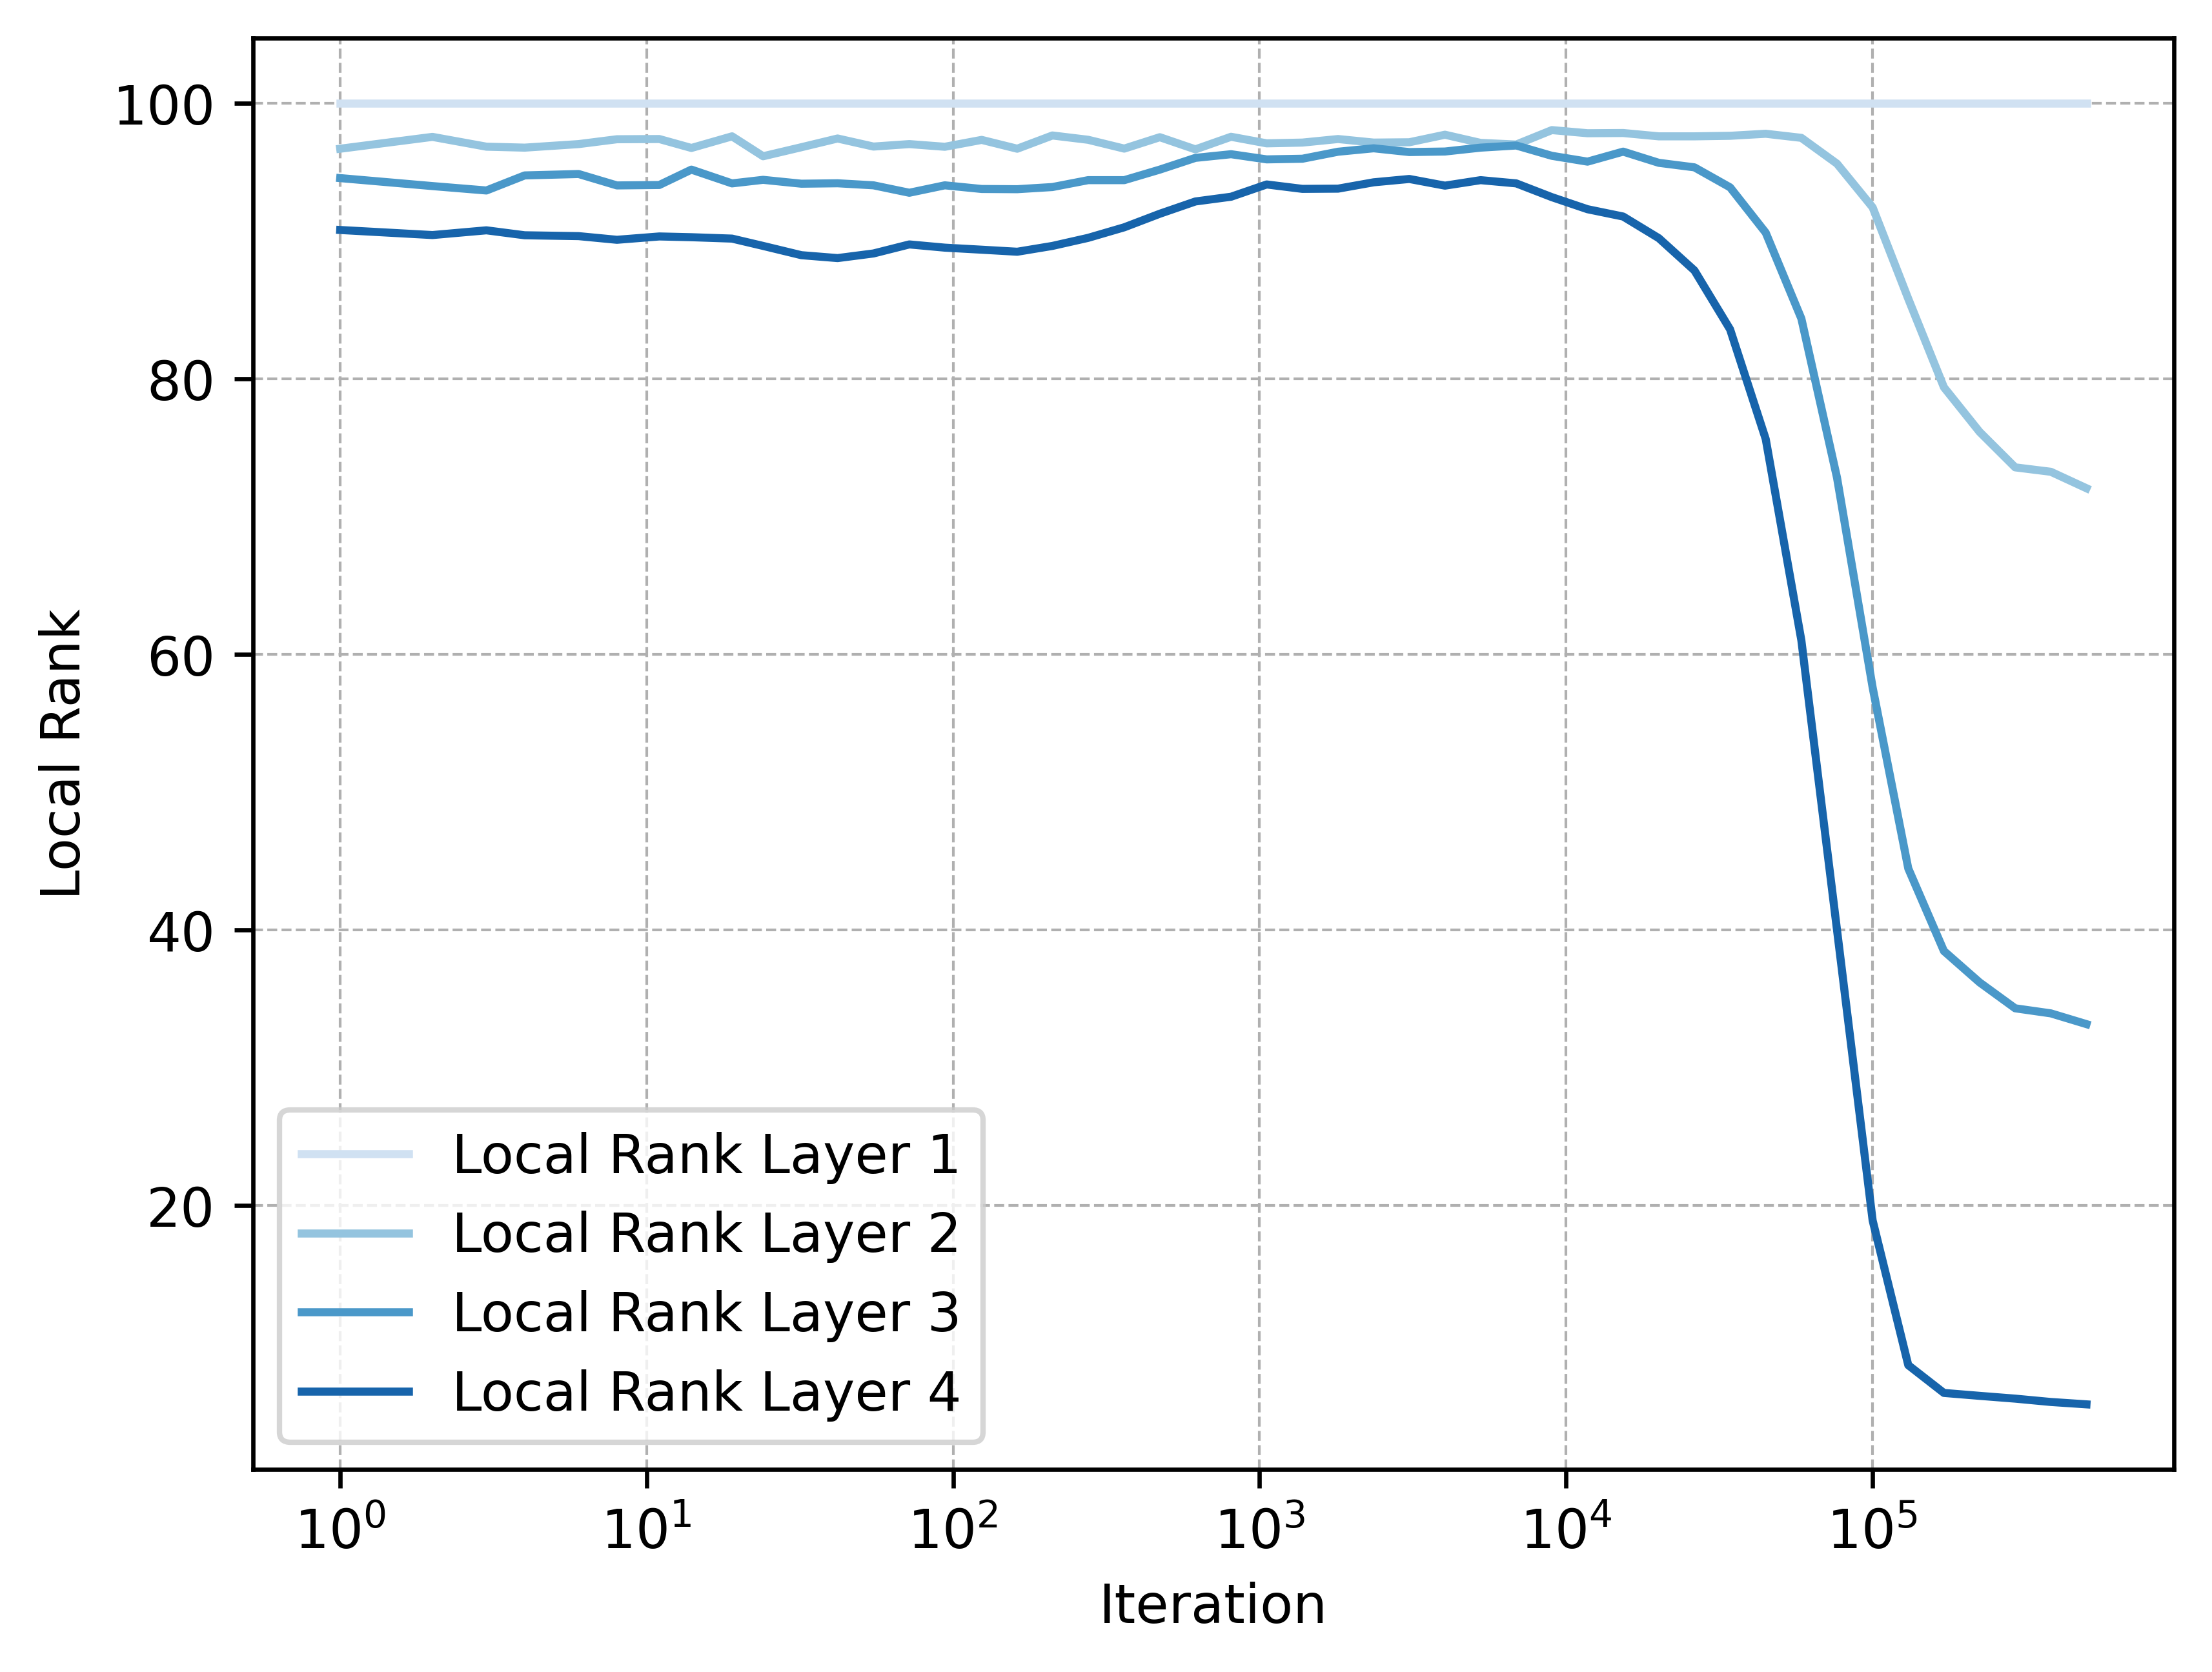

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the color palette to a gradient of blues
colors = sns.color_palette("Blues", len(df_local_ranks.columns))

# Create a figure and axes
fig, ax = plt.subplots()

# Plot each local rank term with a different color
for i, col in enumerate(df_local_ranks.columns):
    sns.lineplot(data=df, x='iter', y=col, ax=ax, color=colors[i])

# Set the y-axis label
ax.set_ylabel('Local Rank')

# Set the x-axis label
ax.set_xlabel('Iteration')
ax.set_xscale('log')

# Set the legend title
ax.legend(title='Legend')

# Set the legend location

# Add manually each entry to the legend
for i, col in enumerate(df_local_ranks.columns):
    ax.plot([], [], color=colors[i], label=f"Local Rank Layer {i+1}")

# Set the legend title
#ax.legend(title='Legend')
ax.legend(loc='lower left')

fig.set_dpi(600)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_off()  

# Render the figure
plt.show()

fig.savefig('output12.png')

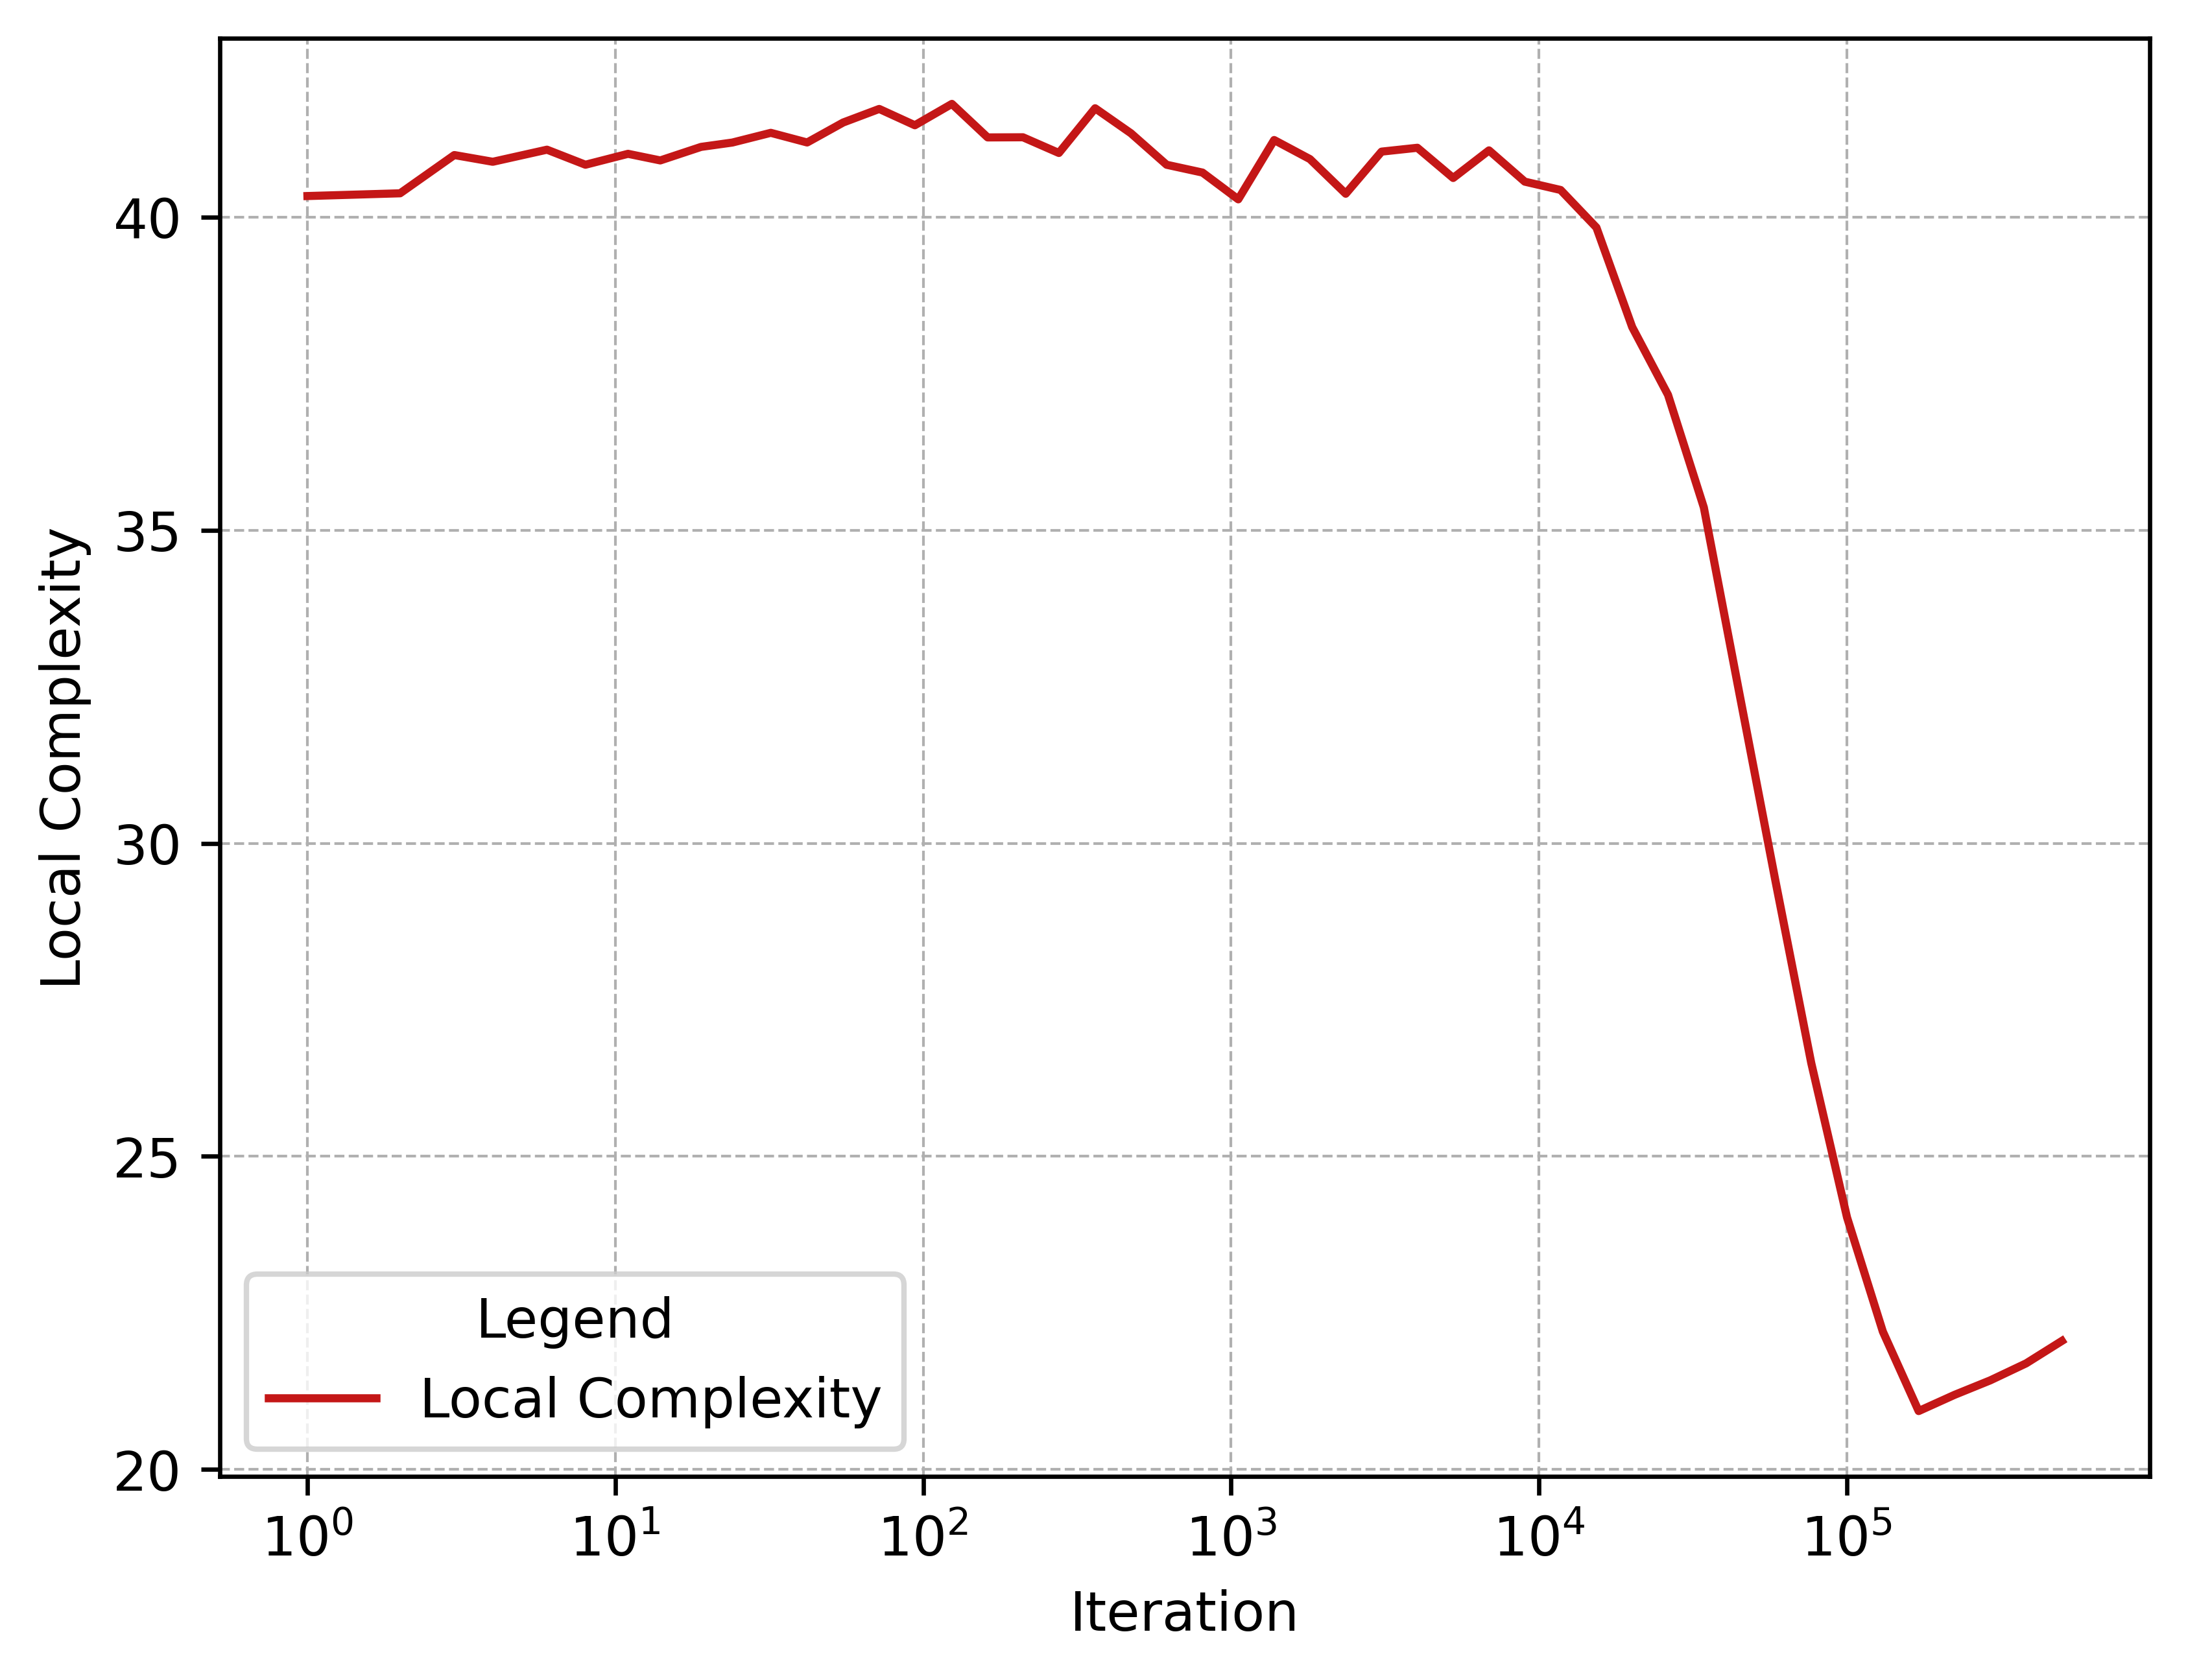

In [ ]:
# Set the color palette to a gradient of reds
colors = sns.color_palette("Reds", len(df.columns[df.columns.str.contains('LC')]))

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the local complexity terms with different colors
for i, col in enumerate(df.columns[df.columns.str.contains('LC')]):
    sns.lineplot(data=df, x='iter', y=col, ax=ax, color="#c41717") # Use a single color for all lines to represent local complexi
    break

# Set the y-axis label
ax.set_ylabel('Local Complexity')

# Set the x-axis label
ax.set_xlabel('Iteration')
ax.set_xscale('log')

# Add manually each entry to the legend
ax.plot([], [], color="#c41717", label=f"Local Complexity")

# Set the legend title
ax.legend(title='Legend', loc='lower left')

# Set the figure DPI
fig.set_dpi(600)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.minorticks_off()  

# Render the figure
plt.show()

fig.savefig('output_local_complexity.png')

In [104]:
ids = ['ccfemh1w', 'y781iz4t', 'ul8bumu7', 'dnypmpjn', 'rgs90czz', 'jbmjo56a']
dataframes = []
for id in ids:
    run = api.run(f"/niket/LRLC_study_Gaussians/runs/{id}")
    df = run.history()
    df_local_ranks = df[df.columns[df.columns.str.contains('local_rank')]]
    df_local_ranks = df_local_ranks.sort_index(axis = 1)
    dataframes.append((df, df_local_ranks))

In [116]:
merged_df_lr = pd.concat([df_lr for _, df_lr in dataframes], axis=0)
merged_df_lr = merged_df_lr.groupby(merged_df_lr.index).agg(lambda x: list(x))
merged_df_lr['iter'] = df['iter'].values
merged_df_lr.head()

merged_df_lc = pd.concat([df[['train/LC']] for df, _ in dataframes], axis=0)
merged_df_lc = merged_df_lc.groupby(merged_df_lc.index).agg(lambda x: list(x))
merged_df_lc['iter'] = df['iter'].values
merged_df_lc.head()


,train/LC,iter
0,"[39.274627685546875, 36.94101333618164, 39.419...",1
1,"[39.42705535888672, 37.13653564453125, 39.5257...",2
2,"[39.47956848144531, 36.946754455566406, 39.519...",3
3,"[39.50731658935547, 36.99238967895508, 39.6543...",4
4,"[39.439170837402344, 37.18660354614258, 39.482...",6


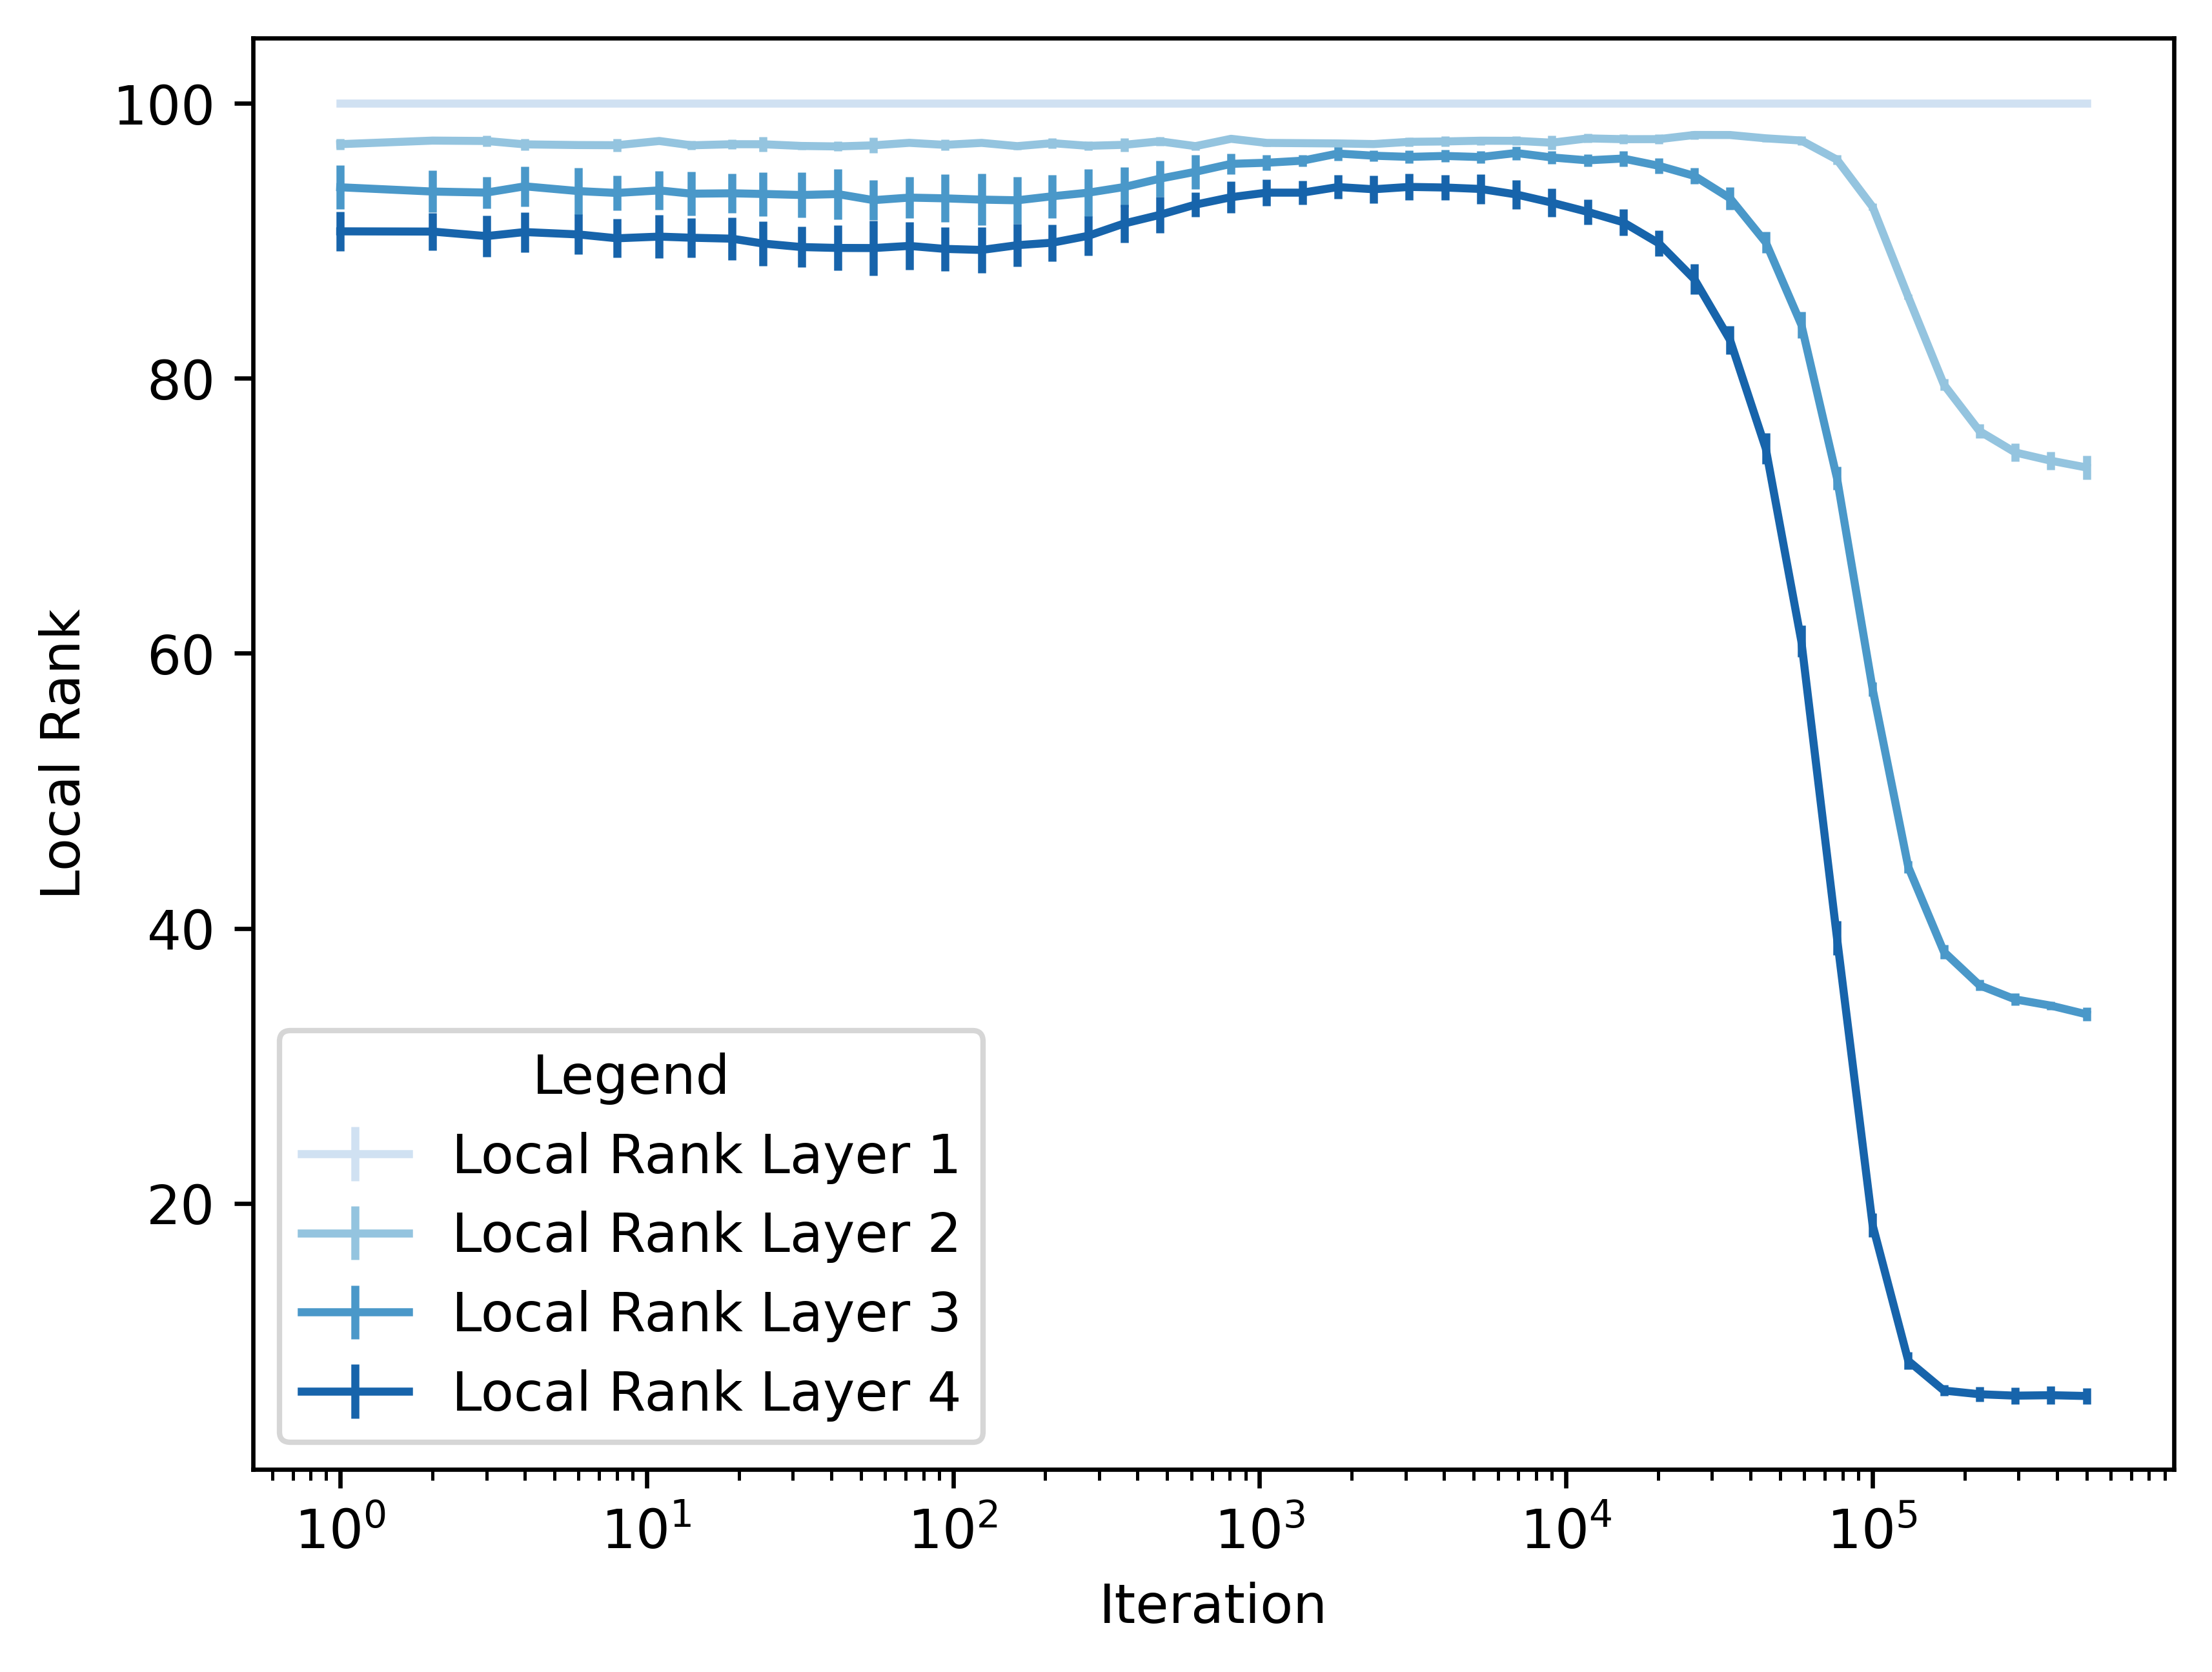

In [120]:
fig, ax = plt.subplots()
    
for i, col in enumerate(merged_df_lr.columns[:-1]):  # Exclude the 'iter' column
    means = merged_df_lr[col].apply(np.mean)
    stds = merged_df_lr[col].apply(np.std)
    ax.errorbar(merged_df_lr['iter'], means, yerr=stds, label=f"Local Rank Layer {i+1}", color=colors[i])

ax.set_ylabel('Local Rank')
ax.set_xlabel('Iteration')
ax.set_xscale('log')
ax.legend(loc='lower left', title='Legend')
fig.set_dpi(600)
plt.show()

fig.savefig('output_error_bar1.png')

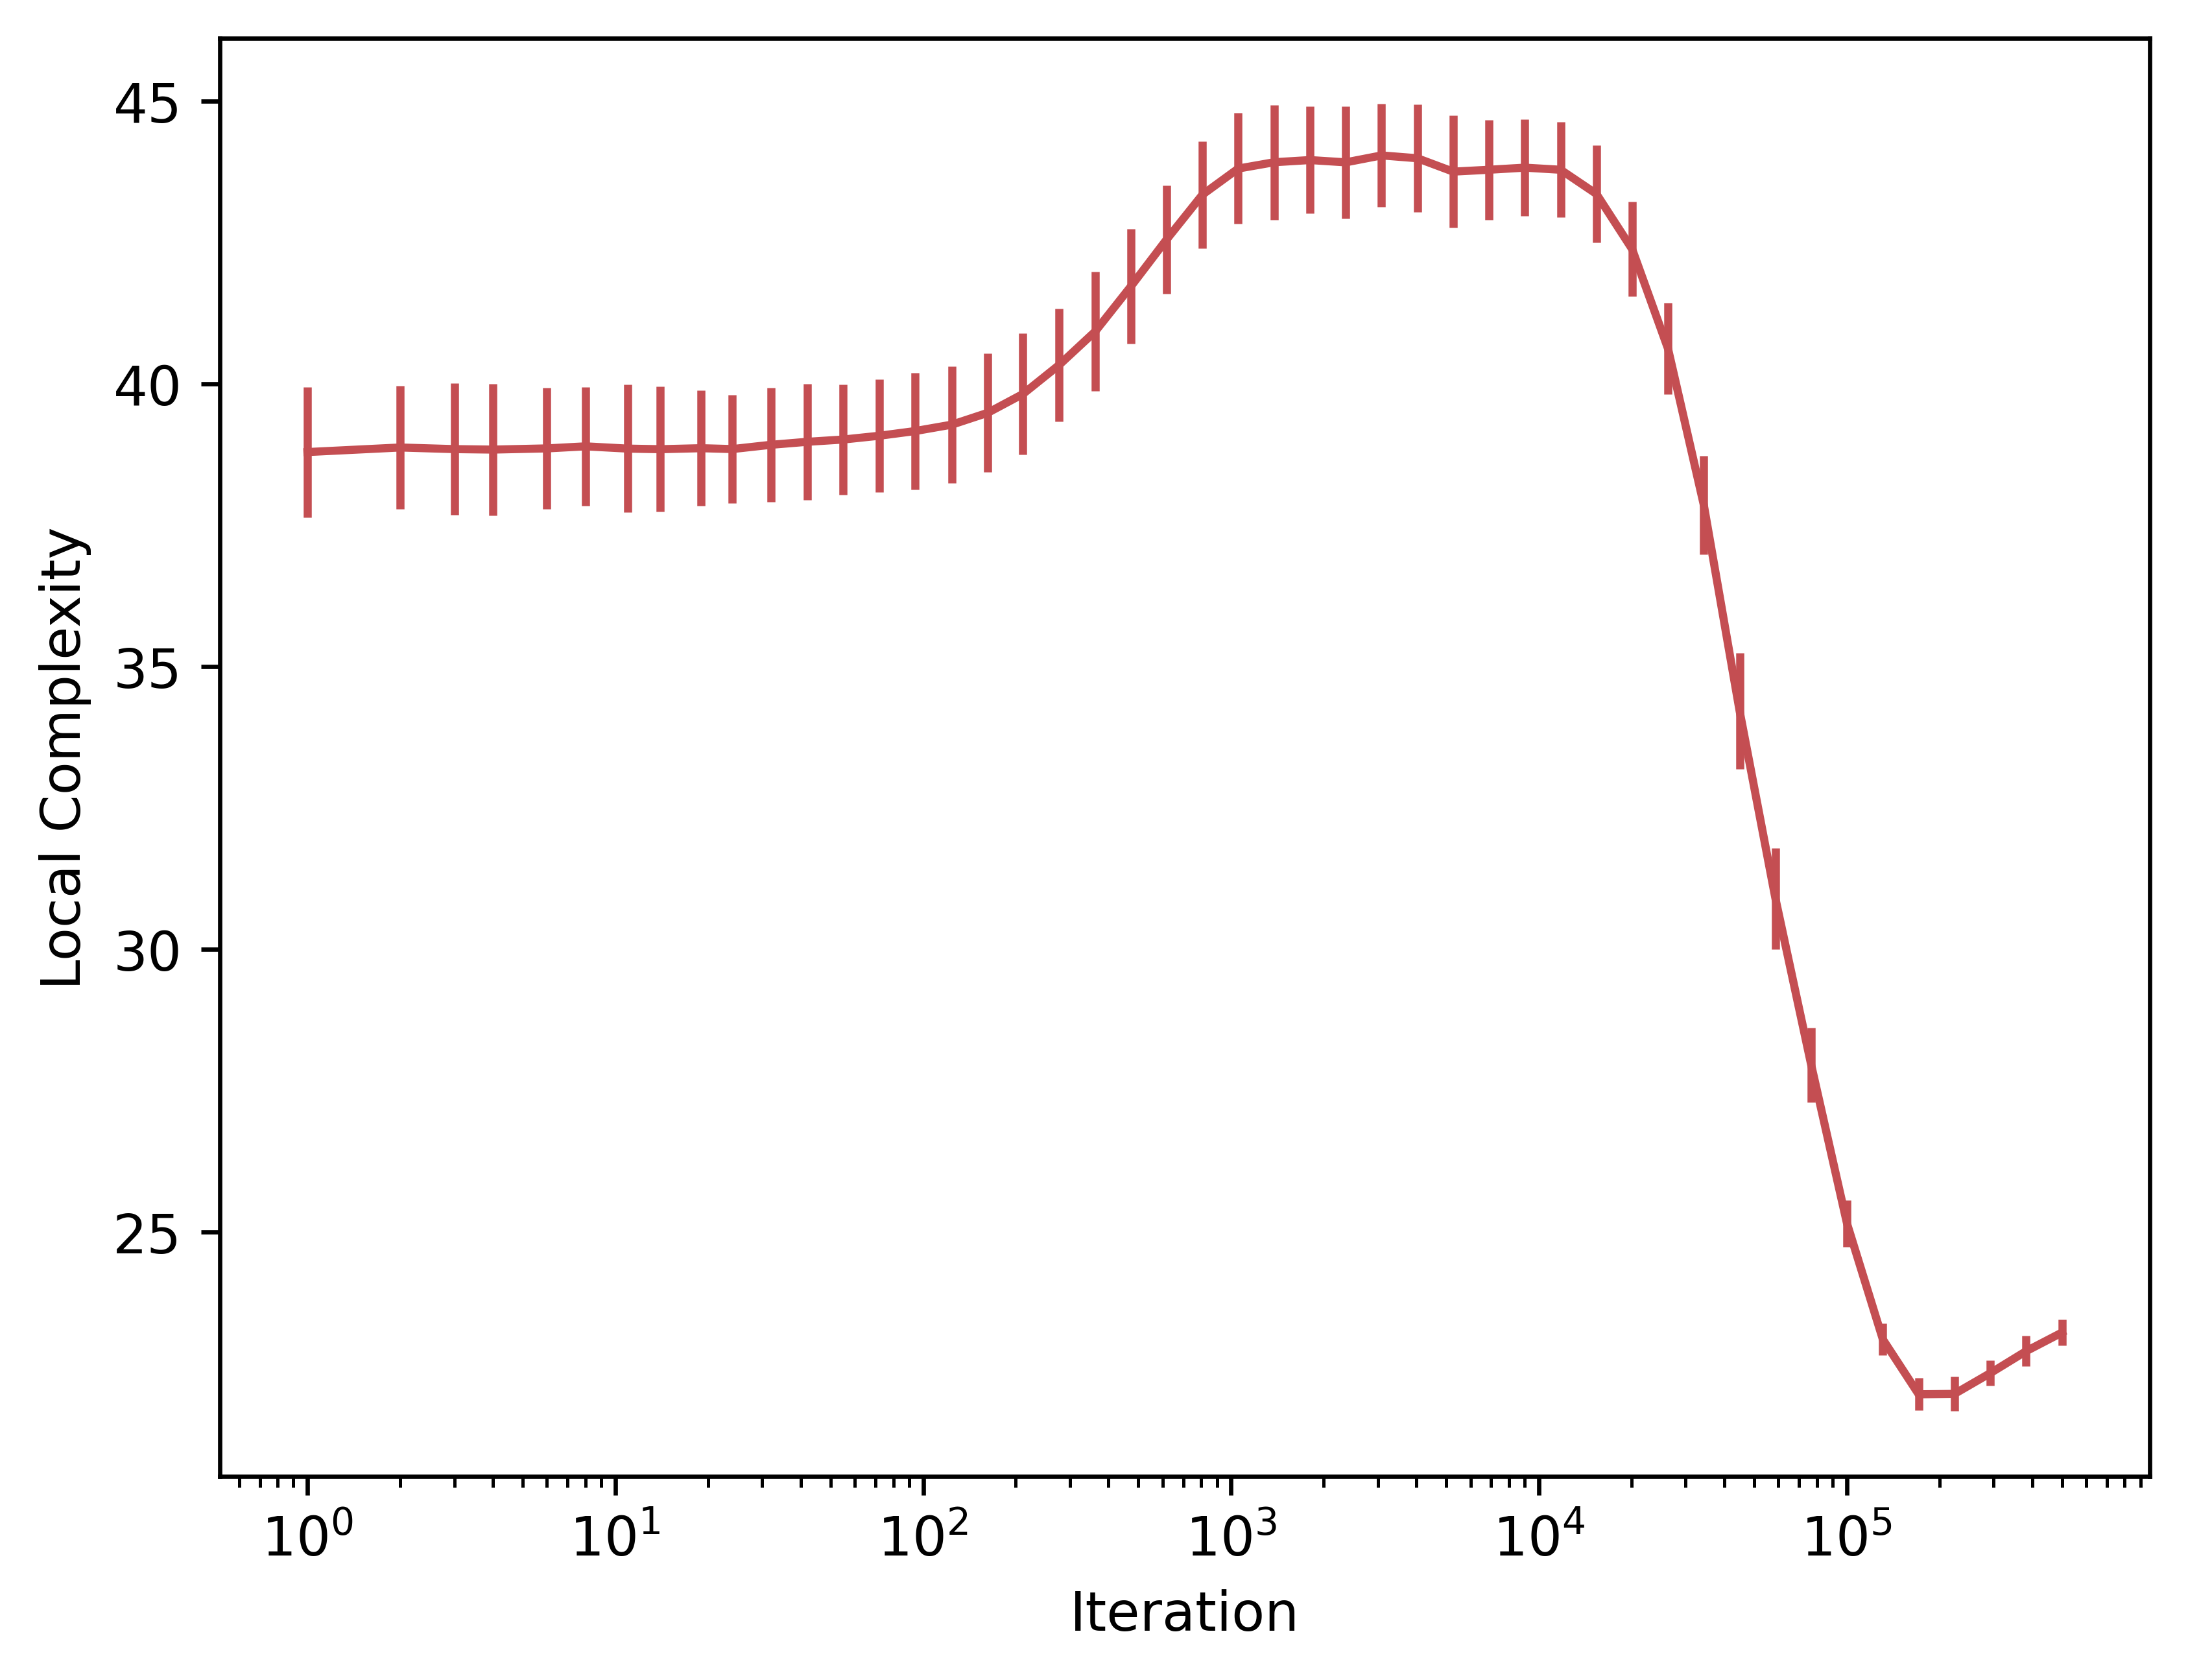

In [124]:
fig, ax = plt.subplots()

for i, col in enumerate(merged_df_lc.columns[:-1]):  # Exclude the 'iter' column
    means = merged_df_lc[col].apply(np.mean)
    stds = merged_df_lc[col].apply(np.std)
    ax.errorbar(merged_df_lc['iter'], means, yerr=stds, label=f"LC {i+1}", color='#c44e52')

ax.set_ylabel('Local Complexity')
ax.set_xlabel('Iteration')
ax.set_xscale('log')
#ax.legend(loc='lower left', title='Legend')
fig.set_dpi(600)
plt.show()

fig.savefig('output_error_bar2.png')

/tmp/ipykernel_1569334/1456791088.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left')


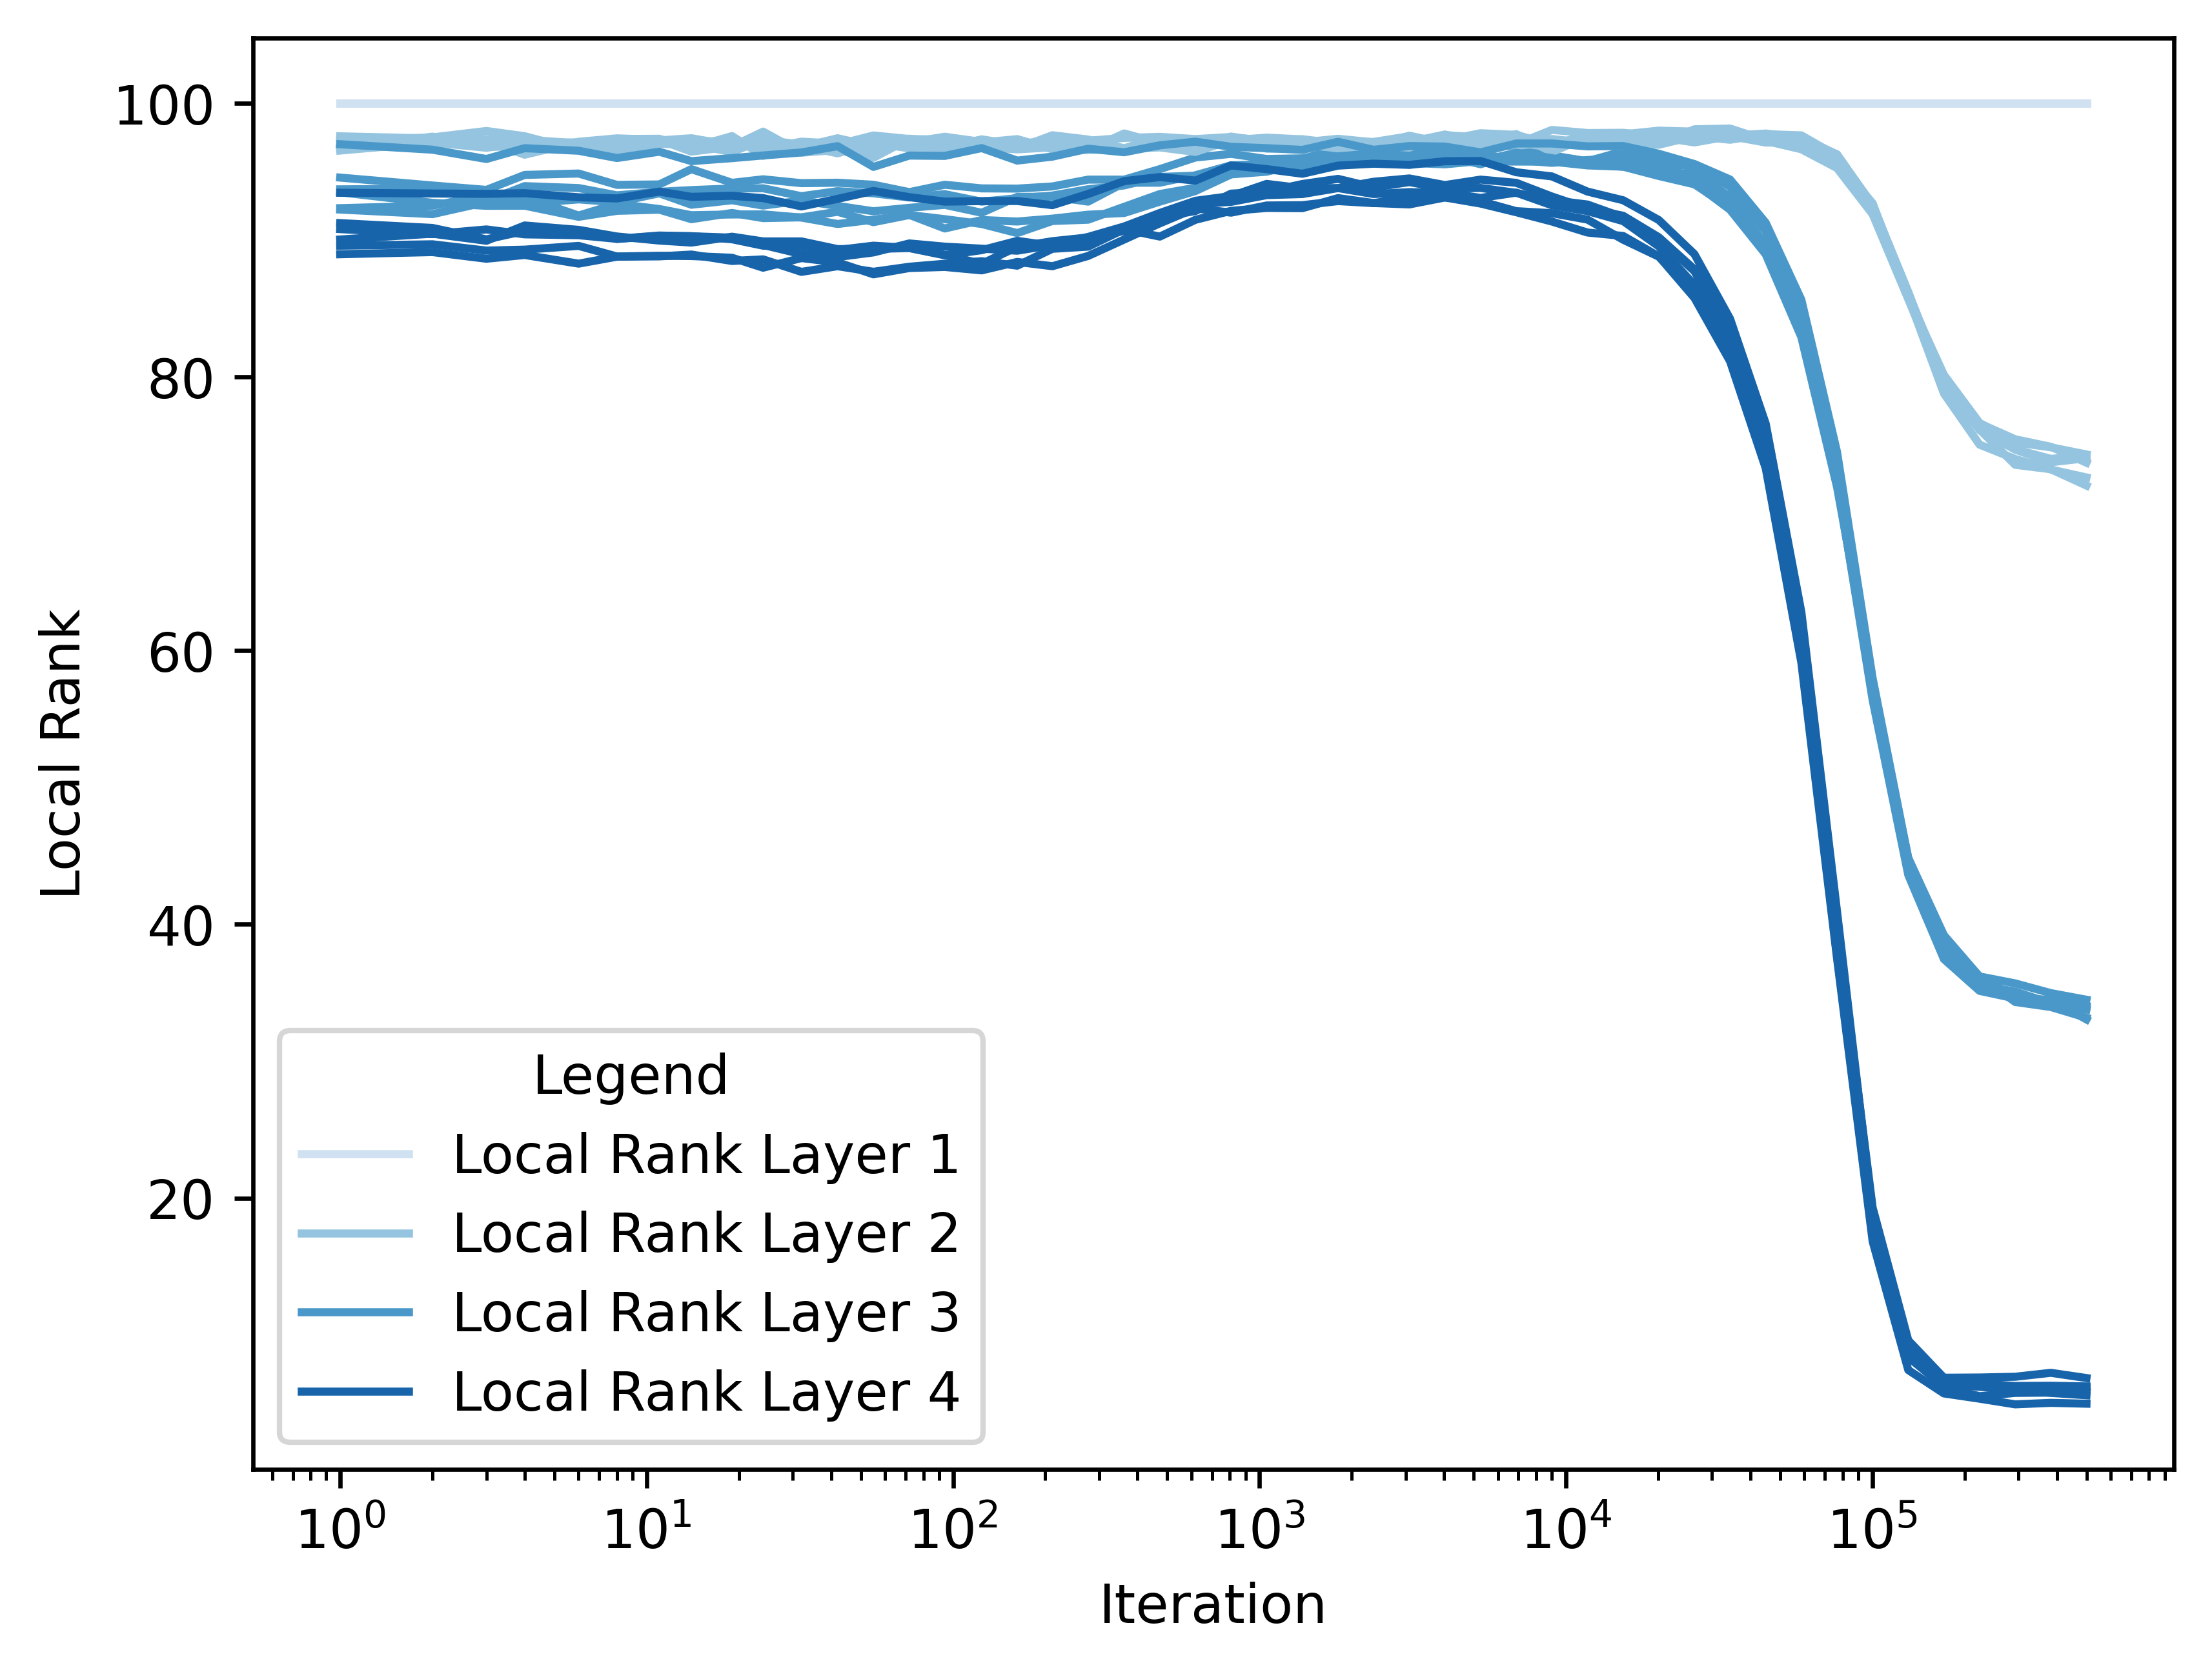

In [109]:
# Assuming you have multiple dataframes like df_local_ranks1, df_local_ranks2, etc.
#dataframes = [df_local_ranks1, df_local_ranks2]  # Add more dataframes as needed

# Set the color palette to a gradient of blues
colors = sns.color_palette("Blues", len(dataframes[0][1].columns))

# Create a figure and axes
fig, ax = plt.subplots()

# Plot each dataframe with confidence intervals
for t in dataframes:
    #print(len(t))
    (df, df_local_rank) = t
    for i, col in enumerate(df_local_rank.columns):
        sns.lineplot(data=df, x='iter', y=col, ax=ax, color=colors[i], errorbar='sd')

# Set the y-axis label
ax.set_ylabel('Local Rank')

# Set the x-axis label
ax.set_xlabel('Iteration')
ax.set_xscale('log')

# Set the legend location
ax.legend(loc='lower left')

# Add manually each entry to the legend
for i, col in enumerate(df_local_ranks.columns):
    ax.plot([], [], color=colors[i], label=f"Local Rank Layer {i+1}")

# Set the legend title
ax.legend(title='Legend')

# Set the figure DPI
fig.set_dpi(600)

# Render the figure
plt.show()

fig.savefig('output_with_confidence_intervals.png')

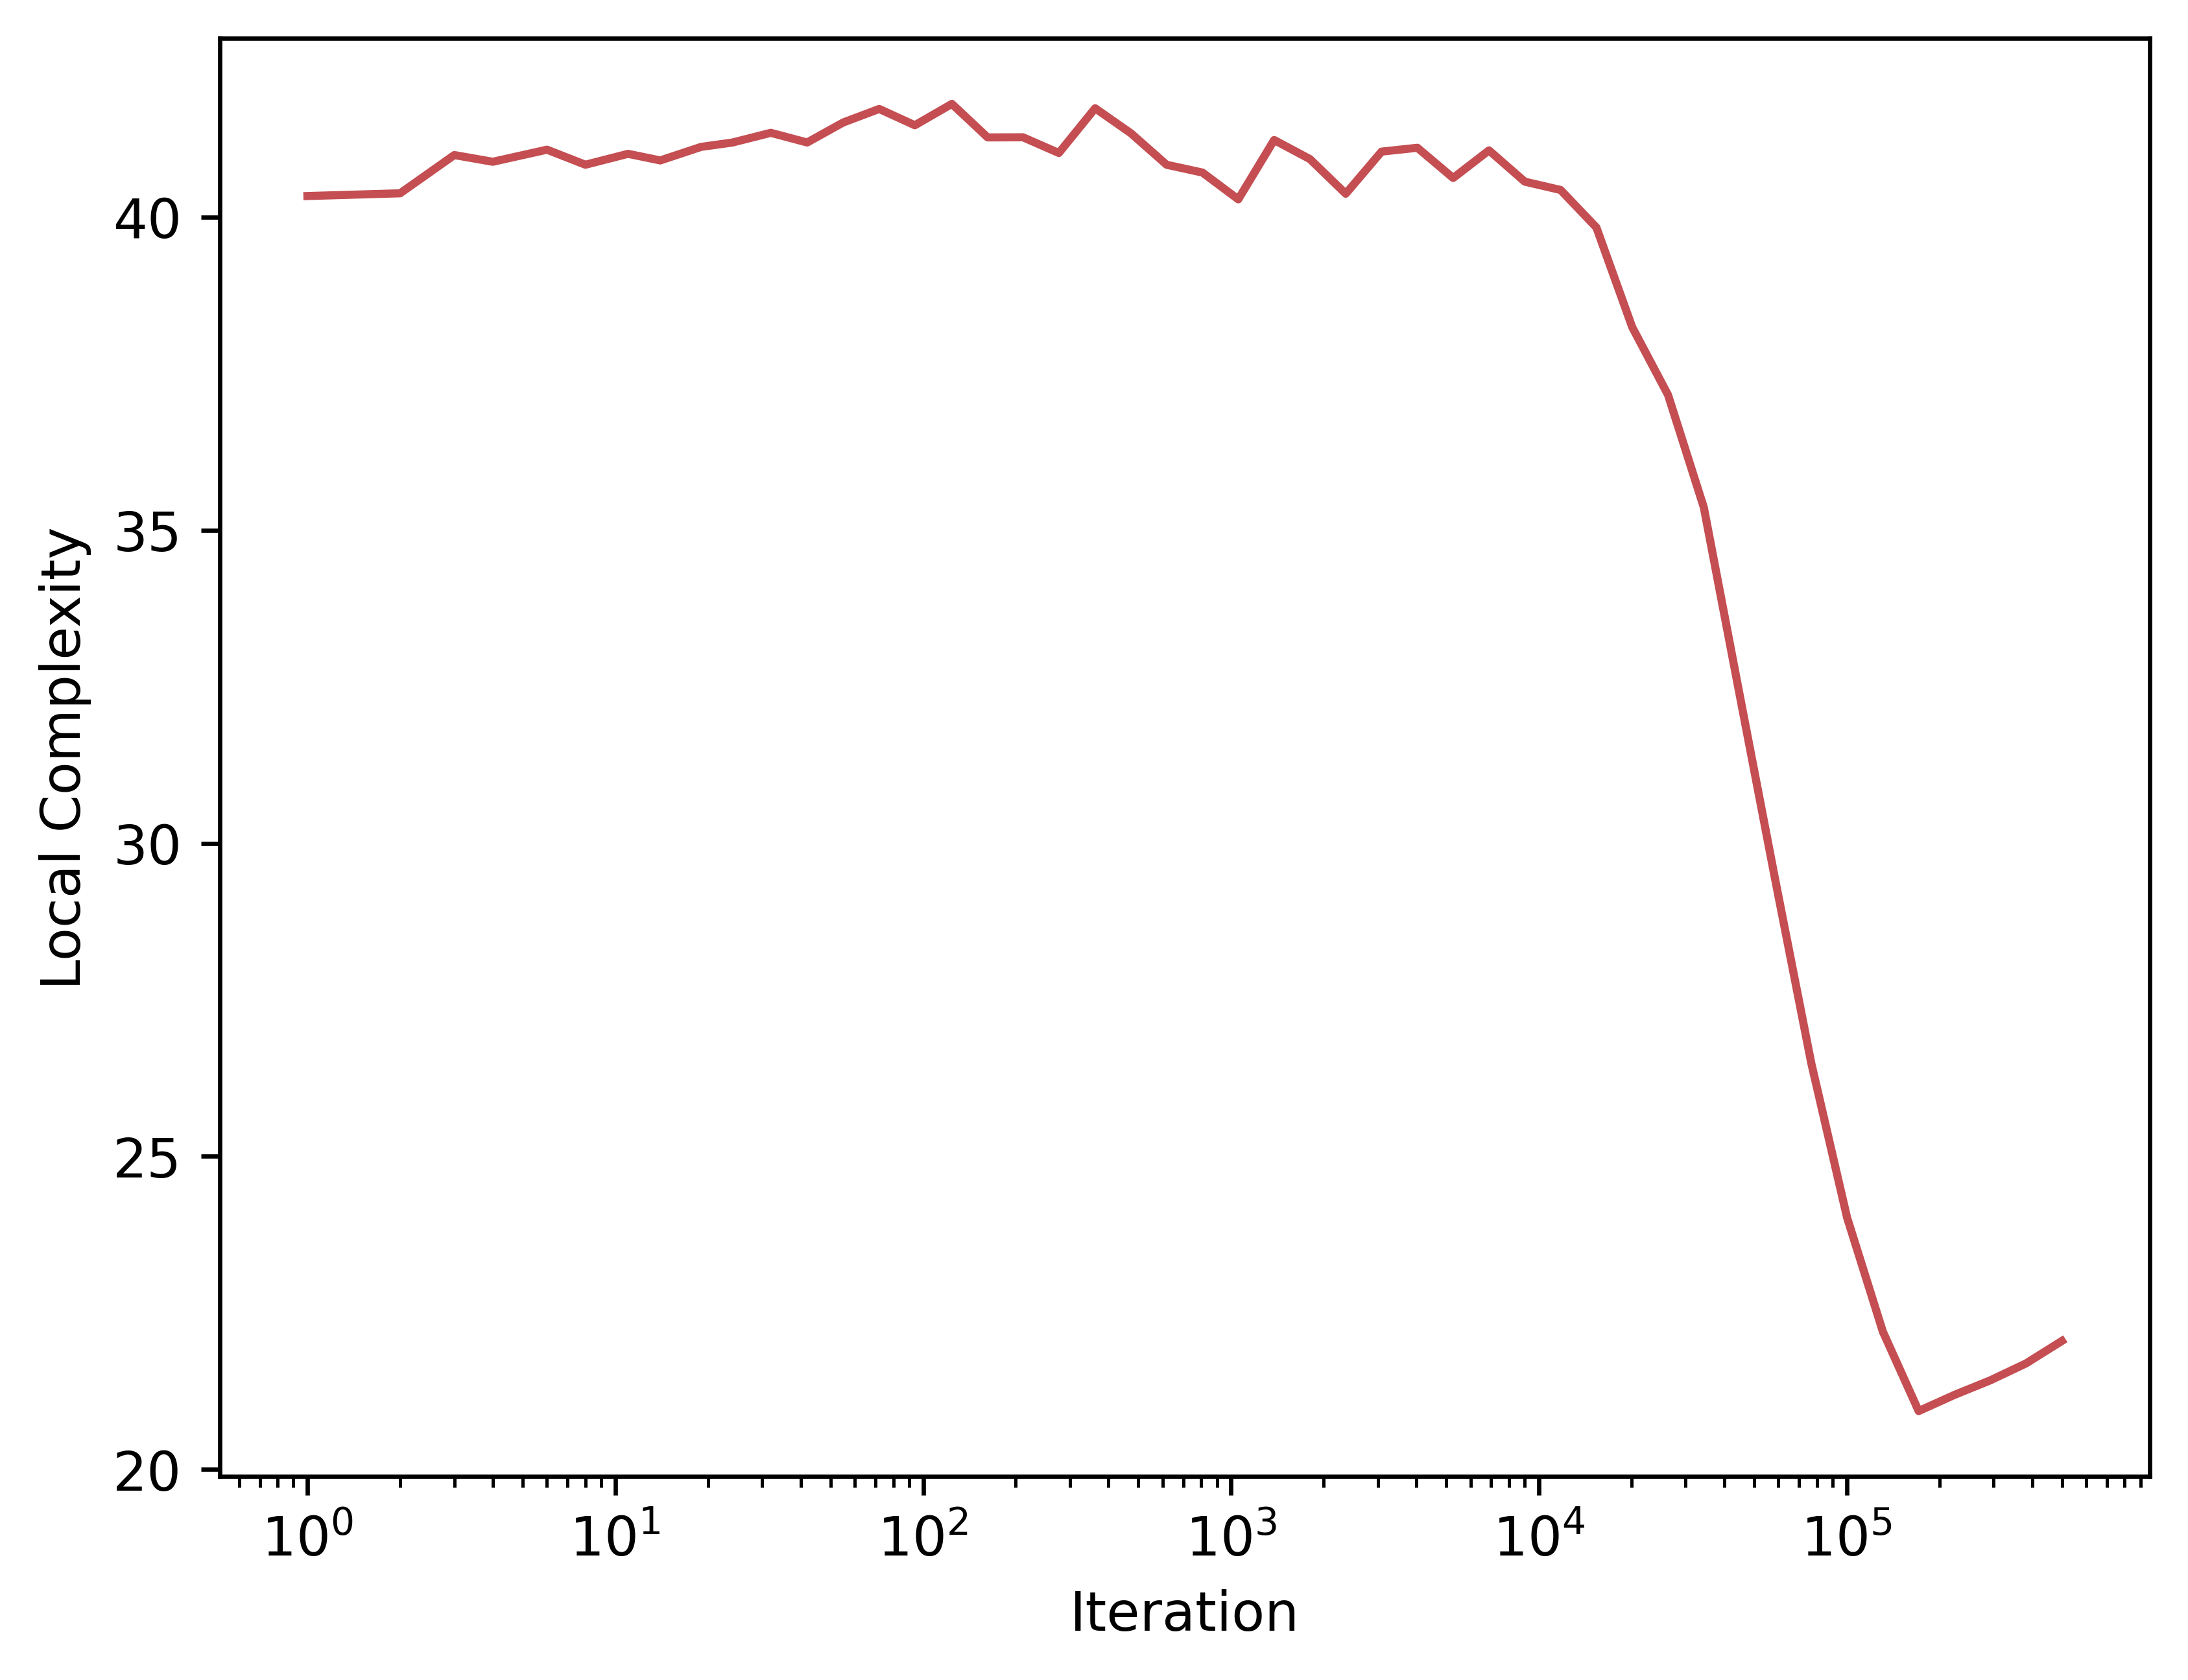

In [76]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the train/LC data on the axes
sns.lineplot(data=df, x='iter', y='test/LC', ax=ax, color="#c44e52")

# Set the y-axis label
ax.set_ylabel('Local Complexity')

# Set the x-axis label
ax.set_xlabel('Iteration')
ax.set_xscale('log')

# Set the figure DPI
fig.set_dpi(600)

# Render the figure
plt.show()

fig.savefig('output11.png')

In [77]:
from PIL import Image

# Open the image files
image1 = Image.open('output11.png')
image2 = Image.open('output12.png')

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Calculate the total height of the stacked image
total_height = height1 + height2

# Create a new image with the width of the wider image and the total height
stacked_image = Image.new('RGB', (max(width1, width2), total_height))

# Paste the first image at the top
stacked_image.paste(image1, (0, 0))

# Paste the second image below the first image
stacked_image.paste(image2, (0, height1))

# Display the stacked image
stacked_image.show()

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


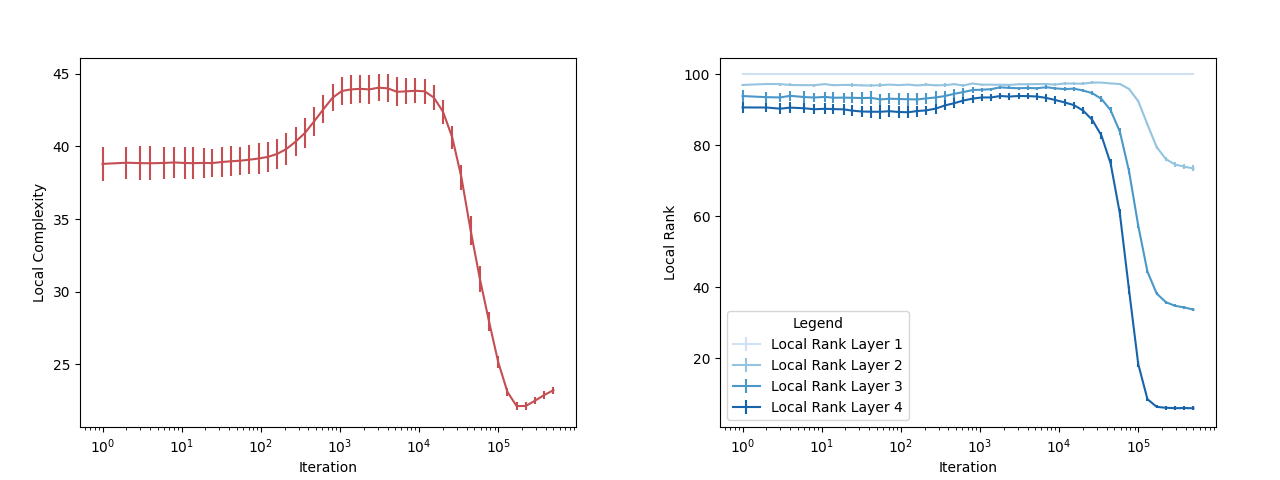

In [125]:
import numpy as np
from PIL import Image

# Open the image files
image1 = Image.open('output_error_bar2.png')
image2 = Image.open('output_error_bar1.png')

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Calculate the total width of the stacked image
total_width = width1 + width2

# Create a new image with the total width and the height of the taller image
stacked_image = Image.new('RGB', (total_width, max(height1, height2)))

# Paste the first image on the left
stacked_image.paste(image1, (0, 0))

# Paste the second image on the right
stacked_image.paste(image2, (width1, 0))

# Display the stacked image
stacked_image